In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Ignoring warning messages in output
import warnings
warnings.filterwarnings('ignore')

In [2]:
TuEyeQ_y = []
TuEyeQ_X = []

with open('TuEyeQ_X.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            TuEyeQ_X.append(row)
TuEyeQ_X = [[float(s) for s in sublist] for sublist in TuEyeQ_X]

with open('TuEyeQ_y.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            TuEyeQ_y.append(row)
TuEyeQ_y = [[int(s) for s in sublist] for sublist in TuEyeQ_y]
TuEyeQ_y = [s[0] for s in TuEyeQ_y]

In [3]:
Doves_y = []
Doves_X = []

with open('Doves_Features_X.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            Doves_X.append(row)
Doves_X = [[float(s) for s in sublist] for sublist in Doves_X]

with open('Doves_Features_y.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            Doves_y.append(row)
Doves_y = [[int(s) for s in sublist] for sublist in Doves_y]
Doves_y = [s[0] for s in Doves_y]

In [4]:
# Patch, remove when i get around to fixing it properly
Doves_X = np.nan_to_num(Doves_X)
TuEyeQ_X = np.nan_to_num(TuEyeQ_X)

### Classification

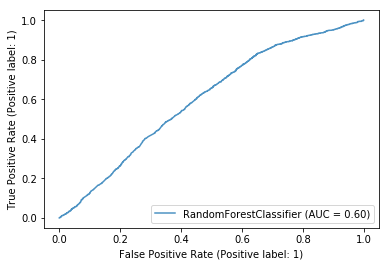

In [5]:
# RFC

train_X = Doves_X
train_y = Doves_y
test_X = TuEyeQ_X
test_y = TuEyeQ_y

model = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', min_samples_split=5,
    min_samples_leaf=1, random_state=42, max_features='sqrt'
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

rfc_acc_score = accuracy_score(test_y, pred_values)
rfc_f1_score = f1_score(test_y, pred_values)
rfc_recall_score = recall_score(test_y, pred_values)
rfc_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
rfc_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)


RF classifier results:
Acc. = 0.5083729948880663
F1 = 0.15816480531240568
Recall = 0.09222104892643436
Precision = 0.5550847457627118

Dummy classifier results:
Acc. = 0.4992067689053411
F1 = 0.0
Recall = 0.0
Precision = 0.0



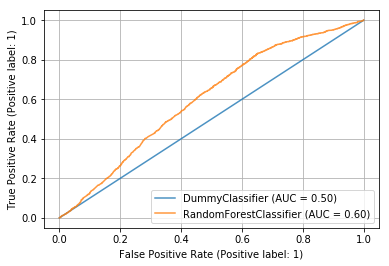

In [6]:
# Dummy

train_X = Doves_X
train_y = Doves_y
test_X = TuEyeQ_X
test_y = TuEyeQ_y

model = DummyClassifier(strategy="most_frequent")

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

d_acc_score = accuracy_score(test_y, pred_values)
d_f1_score = f1_score(test_y, pred_values)
d_recall_score = recall_score(test_y, pred_values)
d_precision_score = precision_score(test_y, pred_values)

plt.grid()
ax = plt.gca()
d_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)

print(f"""
RF classifier results:
Acc. = {rfc_acc_score}
F1 = {rfc_f1_score}
Recall = {rfc_recall_score}
Precision = {rfc_precision_score}

Dummy classifier results:
Acc. = {d_acc_score}
F1 = {d_f1_score}
Recall = {d_recall_score}
Precision = {d_precision_score}
""")

In [7]:
train_X[0]

array([2.71447476e-01, 5.86320139e+02, 3.78884951e+02, 3.33333333e-01,
       1.29124132e+01])

In [10]:
test_X[0]

array([3.04884334e+00, 7.38113332e+02, 2.11816805e+02, 5.00000000e-01,
       2.65649605e+01])